# Flare 2023/06/18

In [17]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [18]:
import os

# Specify the path to the folder you want to list files from
folder_path = "C:\\Users\\Gebruiker\\Documents\\school\\solar flares2\\data not on the disk\\nb_5876_2023-06-18T09_37_12_09_37_12=0-15_stokes_corrected_export2023-11-24T11_51_27_im.fits"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



In [19]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
print(maximum)
head0

16


SIMPLE  =                    T / Written by IDL:  Mon Aug 21 09:09:02 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2716 / Number of positions along axis 1               
NAXIS2  =                 2716 / Number of positions along axis 2               
NAXIS3  =                   25 / Number of positions along axis 3               
NAXIS4  =                    4 / Number of positions along axis 4               
NAXIS5  =                   16 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [20]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[5].data
    pos = io[1].data




wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstHe.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001DD86B346E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD81926720>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD81925BE0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD819240B0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001DD81924950>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD81925400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191D9D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191D280>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191CAD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191E540>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191EFF0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191F920>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD8191DD90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001DD818AE360>, <astropy.io.fits.hdu.ta

In [21]:
pos[0][0][:,:,0,0,2][0]

array([587.55397852, 587.56197852, 587.56997852, 587.57597852,
       587.57797852, 587.58297852, 587.58997852, 587.59697852,
       587.60397852, 587.61097852, 587.61797852, 587.62497852,
       587.63197852, 587.63897852, 587.64597852, 587.65297852,
       587.65997852, 587.66697852, 587.67397852, 587.67797852,
       587.68597852, 587.69397852, 587.70197852, 587.70997852,
       587.71797852], dtype='>f8')

In [22]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3, np.shape(tlist3)

('35.60834',
 array(['2023-06-18T09:37:48.33389', '2023-06-18T09:38:41.89900',
        '2023-06-18T09:39:35.60834', '2023-06-18T09:40:29.27005',
        '2023-06-18T09:41:22.72121', '2023-06-18T09:42:16.39783',
        '2023-06-18T09:43:10.15697', '2023-06-18T09:44:03.88312',
        '2023-06-18T09:44:57.40074', '2023-06-18T09:45:50.99893',
        '2023-06-18T09:46:44.70905', '2023-06-18T09:47:38.43431',
        '2023-06-18T09:48:31.90388', '2023-06-18T09:49:25.51209',
        '2023-06-18T09:50:19.29398', '2023-06-18T09:51:13.07729'],
       dtype='<U25'),
 (16,))

In [23]:
time_list = [t[11:] for t in tlist3]
time_list

['09:37:48.33389',
 '09:38:41.89900',
 '09:39:35.60834',
 '09:40:29.27005',
 '09:41:22.72121',
 '09:42:16.39783',
 '09:43:10.15697',
 '09:44:03.88312',
 '09:44:57.40074',
 '09:45:50.99893',
 '09:46:44.70905',
 '09:47:38.43431',
 '09:48:31.90388',
 '09:49:25.51209',
 '09:50:19.29398',
 '09:51:13.07729']

In [32]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [33]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (25, 2716, 2716)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

C:\Users\Gebruiker\Documents\school\solar flares2\data not on the disk\nb_5876_2023-06-18T09_37_12_09_37_12=0-15_stokes_corrected_export2023-11-24T11_51_27_im.fits
s=(25, 2716, 2716)
the shape of the data is (16, '??', 25, 2716, 2716)
the wavelengths are self._wavel = array([5875.53978516, 5875.61978516, 5875.69978516, 5875.75978516,
       5875.77978516, 5875.82978516, 5875.89978516, 5875.96978516,
       5876.03978516, 5876.10978516, 5876.17978516, 5876.24978516,
       5876.31978516, 5876.38978516, 5876.45978516, 5876.52978516,
       5876.59978516, 5876.66978516, 5876.73978516, 5876.77978516,
       5876.85978516, 5876.93978516, 5877.01978516, 5877.09978516,
       5877.17978516])
Boundary
Blue=Outside, yellow=Inside


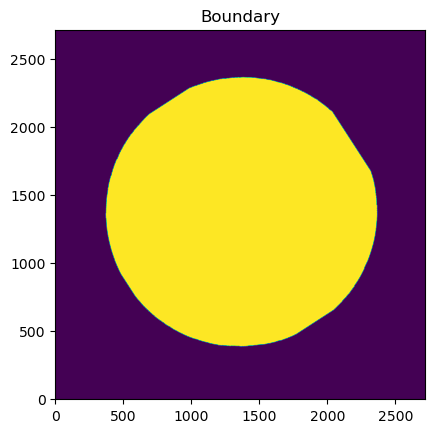

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

He = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHe.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='He23a', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

He.boundary


In [35]:
secs = un.get_TIME(He)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{He.shape=}')

the mean cadence is 53.66666666666697 seconds for this line!
He.shape=(16, '??', 25, 2716, 2716)


The guessed filters are [[3.666666666666667, 3.125], [12.0, 3.125], [20.333333333333332, 3.125]]


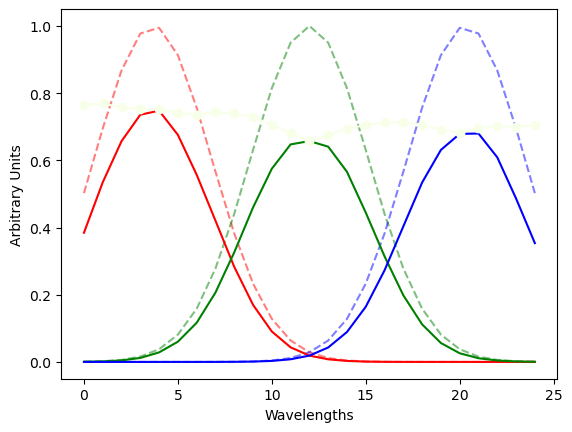

In [36]:
# %matplotlib inline
He.update_filters(None)# [[3,2], [7,2], [11,2]]
He.plot_filt(880,900)
plt.show()

## Calculating the $\mu$ !!!!! 


In [37]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(He.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
        
            pass


SIMPLE  =                    T / Written by IDL:  Mon Aug 21 09:09:02 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 2716 / Number of positions along axis 1              
 NAXIS2  =                 2716 / Number of positions along axis 2              
 NAXIS3  =                   25 / Number of positions along axis 3              
 NAXIS4  =                    4 / Number of positions along axis 4              
 NAXIS5  =                   16 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [38]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[0,0]

(array([[[[[-467.67885154, -448.93392252],
           [-348.21885154, -448.93392252]],
 
          [[-467.67885154, -329.47392252],
           [-348.21885154, -329.47392252]]],
 
 
         [[[-467.67885154, -448.93392252],
           [-348.21885154, -448.93392252]],
 
          [[-467.67885154, -329.47392252],
           [-348.21885154, -329.47392252]]],
 
 
         [[[-467.67885154, -448.93392252],
           [-348.21885154, -448.93392252]],
 
          [[-467.67885154, -329.47392252],
           [-348.21885154, -329.47392252]]],
 
 
         ...,
 
 
         [[[-467.67885154, -448.93392252],
           [-348.21885154, -448.93392252]],
 
          [[-467.67885154, -329.47392252],
           [-348.21885154, -329.47392252]]],
 
 
         [[[-467.67885154, -448.93392252],
           [-348.21885154, -448.93392252]],
 
          [[-467.67885154, -329.47392252],
           [-348.21885154, -329.47392252]]],
 
 
         [[[-467.67885154, -448.93392252],
           [-348.21885154, -448.93

[-466.96275428 -347.50275428 -449.76713812 -330.30713812]


does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8088409633626538 for timeframe 8
Coundourplot succesfully saved.


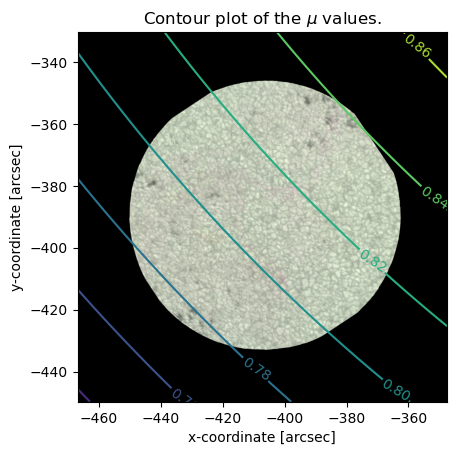

In [39]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

sst_data = He

fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], He.shape[4])
y = np.linspace(fyp[0], fyp[1], He.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))

sst_data.fov = [xx, yy]

reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, False)
        over.fov = [X, Y]
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=He, save=True, save_name=He.name_of_line, timeFrame=maximum//2)
sst_data = He
set_mu(He, mu)
# fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_He.index_mu], theor_line.sst_clv[theor_He.index_mu][0], clv_fit(mu, theor_line)




## Finding a suitable quiet sun patch

<>:38: SyntaxWarning: invalid escape sequence '\C'
<>:38: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14660\3637760581.py:38: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_He.png')


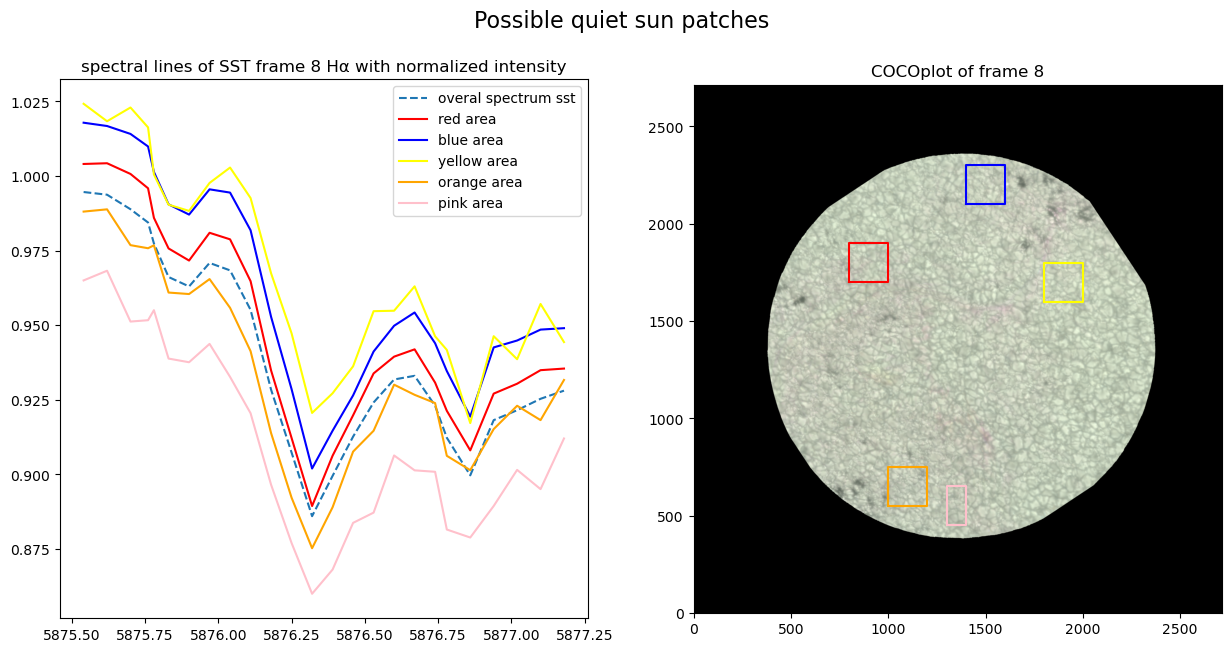

In [40]:
frame=maximum//2

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

He.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(800,1000),(1700,1900)], [(1400,1600), (2100, 2300)], [(1800,2000), (1600, 1800)],  [(1000,1200),(550,750)], [(1300,1400),(450,650)]]
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
He.frame_integrated_spect(frame)
ax[0].plot(He._wavel, He.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_He.sst_wav + theta[0], theta[2] * theor_He.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[1].imshow(He.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(He._wavel, He.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_He.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [51]:
color_wanted_patch = 'pink'

the edges of the patch are denoted by the xlim: (1300, 1400) and ylim: (450, 650)


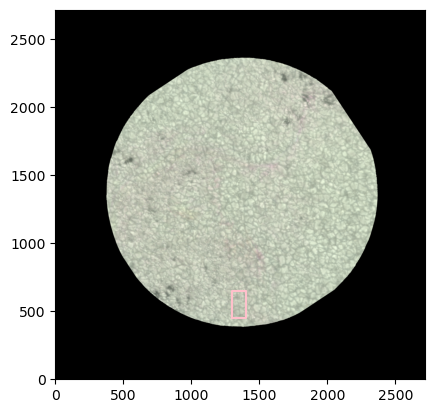

{'frame': 8, 'xlim': (1300, 1400), 'ylim': (450, 650), 'color': 'pink'}

In [52]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

He.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
He.quiet_sun

## The full FOV integrated spectrum over time:

In [53]:
sst_data = He
He.shape

(16, '??', 25, 2716, 2716)

In [44]:
He.calculate__FOV_spect_over_time()

In total 16 frames.
Now calculating frame:
15

In [45]:
sst_data.quiet_sun

{'frame': 8, 'xlim': (1400, 1600), 'ylim': (2100, 2300), 'color': 'blue'}

# Comparing to atlas: fixing quiet sun!

In [46]:
import use_nessi as un1
import data_analysis as da

atlas = f.getdata("E:/solar flares/data/2017-09-06/fits/solar_atlas_V1_405-1065.fits")
atlas_w = np.arange(len(atlas)) * -0.003766534468 + 24700.0858041
aw = 1e8 / atlas_w

lw = sst_data._wavel[0]
rw = sst_data._wavel[-1]

if lw > aw[-1] or rw < aw[0]:
    print(f"The line of sst and atlas do not coincde! SST: min={lw}, max={rw}")
    print(f"and atlas: min={aw[0]}, max={aw[-1]}. The advise is taking a new consistent atlas.")
    raise ValueError("The line of sst and atlas do not coincde.")

llw = np.where(aw > lw-3)[0][0]
lrw = np.where(aw > rw+3)[0][0]

fd = atlas[llw:lrw]
fdw = aw[llw:lrw]

ff = interp1d(fdw, fd, kind='linear', fill_value="extrapolate")
# Use this function to compute the new values
fdd = ff(sst_data._wavel)

sst_wav = sst_data._wavel
quiet_spect = sst_data.quiet_spect


def fit_atlas_to_nessi(aa2, minimum=True, quality=True, initial_values=None):



    l = len(sst_wav)
    data = [sst_wav,  quiet_spect ,np.zeros(l)+0.001,np.zeros(l)+0.001]

    multiplier = 1/0.85

    # theta = [horizontale translatie, verticale translatie, verticale schaalfactor]
    model_atlas = lambda theta : interp1d(fdw , aa2*theta[2] , kind='linear', fill_value="extrapolate")


    # fdw + rv,aa2*multiplier, color='black', lw=2, label='Atlas Convolved'
    # sst_wav, test_si, color='red', label='Full CLV'
    if initial_values is None:
        initial_values=np.array([0, 0, multiplier])

    mini = da.optimalisatie(data, model=model_atlas, beginwaarden=initial_values, fout_model=None, plot=False)
    theta = mini['x']
    da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
                labely=" $Intensity$  [arbitrary units]", figname=None , error=False)
    if quality:
        print(mini)
        da.kwaliteit_fit(data, mini)
    sst_data.theta_nessi_to_quiet_sun = theta
    return theta
    


def quiet_spect_atlas_check(show_all=False,initial_values_fit=None):
        # if self.neglect_atlas:
        #     return
        # test_si = quiet_spect

        # #test_si = test_si/np.min(test_si)*np.min(test_si)
        # test_si = test_si/test_si[0]
        # sst_dc = sst_dc/sst_dc[0]
        # fdd = fdd/fdd[0]

        # quiet_spect = test_si


        import ISPy.spec.crisp as c
        dw = 0.07
        ntw = 59
        tw = (np.arange(ntw)-ntw//2)*dw
        # fpife = c.crisp(np.median(sst_wav))
        fc = c.crisp(np.median(sst_wav))
        tr = fc.dual_fpi(tw, erh = -0.022) #6301-2

        tr /= tr.sum()
        inst_prof = np.zeros((len(tr),2))
        inst_prof[:,0] = tw+np.abs(tw.min())
        inst_prof[:,1] = tr

        import ISPy.spec.calib as cb

        aa = cb.convolve_atlas(fdw,fd,inst_prof)
        aa2=aa
        # fit_atlas_to_nessi(quality=show_all, initial_values=initial_values_fit)
        theta  = fit_atlas_to_nessi(aa2,  minimum=True, quality=True, initial_values=initial_values_fit)


        if show_all:
            print(len(fdw))

            plt.plot(fdw,fd, label="Atlas")
            plt.plot(fdw, aa, label="Atlas Convolved")
            plt.legend()
            plt.show()


        ff = interp1d(fdw+theta[0], aa2*theta[2]+theta[1], kind='linear', fill_value="extrapolate")
        # Use this function to compute the new values
        fdd = ff(sst_wav)


        fig = plt.subplots(1, 2, figsize=(15,7))
        plt.subplot(121)
        plt.plot(fdw + theta[0] ,fd*theta[2]+theta[1], color='black', linestyle='--', alpha=0.5, label='Atlas (Reiners et al. 2015)')
        plt.plot(fdw + theta[0],aa2*theta[2]+theta[1], color='black', lw=2, label='Atlas Convolved')
        sst_data.atlas_saas_profile = interp1d(fdw + theta[0], aa2*theta[2]+theta[1])(sst_wav)
        # plt.plot(sst_wav, s, color='blue', label='Disk Center')
        plt.plot(sst_wav, quiet_spect, color='red', label='quiet spec')
        plt.xlabel(r'Wavelength [$\rm\AA$]')
        plt.ylabel('Intensity')
        plt.legend()
        # plt.xlim()

        atlas_convolved = [fdw + theta[0],aa2*theta[2]+theta[1]]

        plt.subplot(122)
        plt.plot(sst_wav, quiet_spect/fdd, label='CLV', color='red')
        # plt.plot(sst_wav, s/fdd, label='DC', color='blue')
        plt.xlabel(r'Wavelength [$\rm\AA$]')
        plt.ylabel('Offset [%]')
        plt.legend()

        # plt.ylim(0.93,1.025)
        plt.show()


<>:50: SyntaxWarning: invalid escape sequence '\A'
<>:50: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14660\3299507031.py:50: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",


crisp::read_reflectivity: (RL,RH)[5876.319785156251] = (0.8565835516275785, 0.9266216349877884)


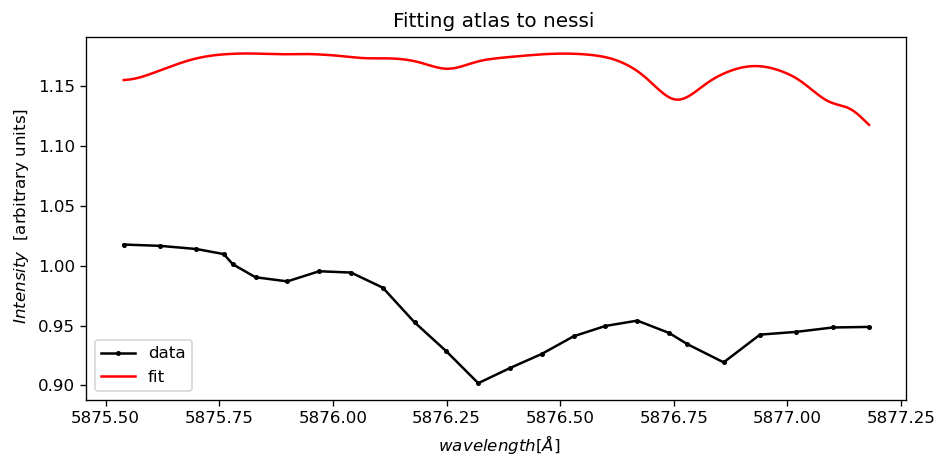

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1025.9200346543296
        x: [ 0.000e+00  0.000e+00  1.176e+00]
      nit: 0
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 4
     njev: 1
de p-waarde is  0.0016382471814080746 
Chi^2 reduced= 46.63272884792407 
aantal vrijheidgraden= 22 
chi^2= 1025.9200346543296
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0016382471814080746 
Oftewel verwerp als p-waarde <lpha-niveau 


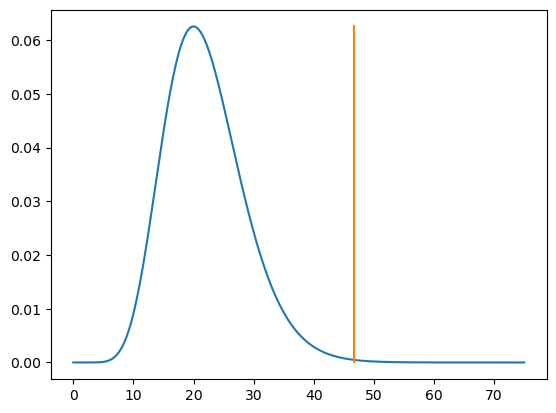

5874


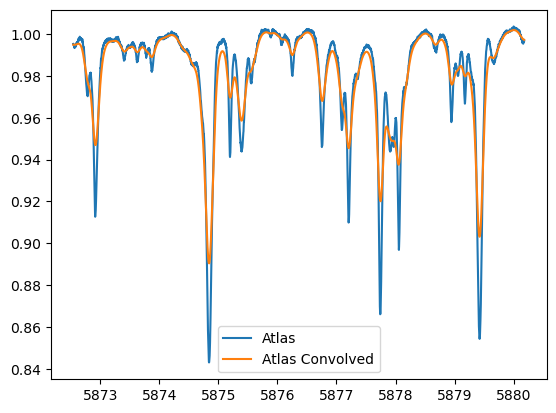

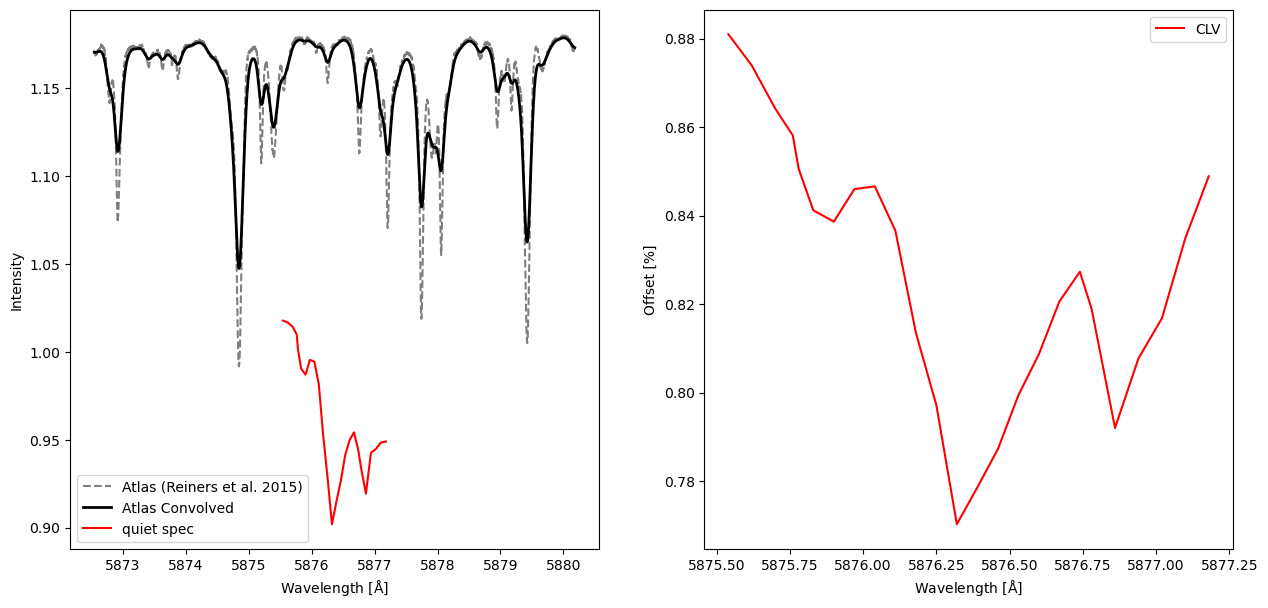

In [47]:
quiet_spect_atlas_check(show_all=True ,initial_values_fit=None)


# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [48]:
import use_nessi as un1

The peak occurs at frame [15] at time ['t=09:51:13 UT'].
The SST data runs from t=09:37:48 UT to t=09:51:13 UT.


The areafactor for THIS flare is 0.002054332143852696 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 165.09%.


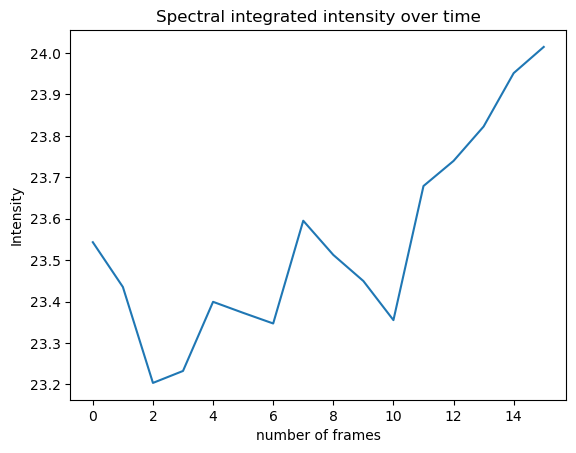

In [49]:
reload(un1)
un1.save_for_further_analysis(He, None)


# Movie Making

Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, 09:37:48.33389, total number of frames: 16 


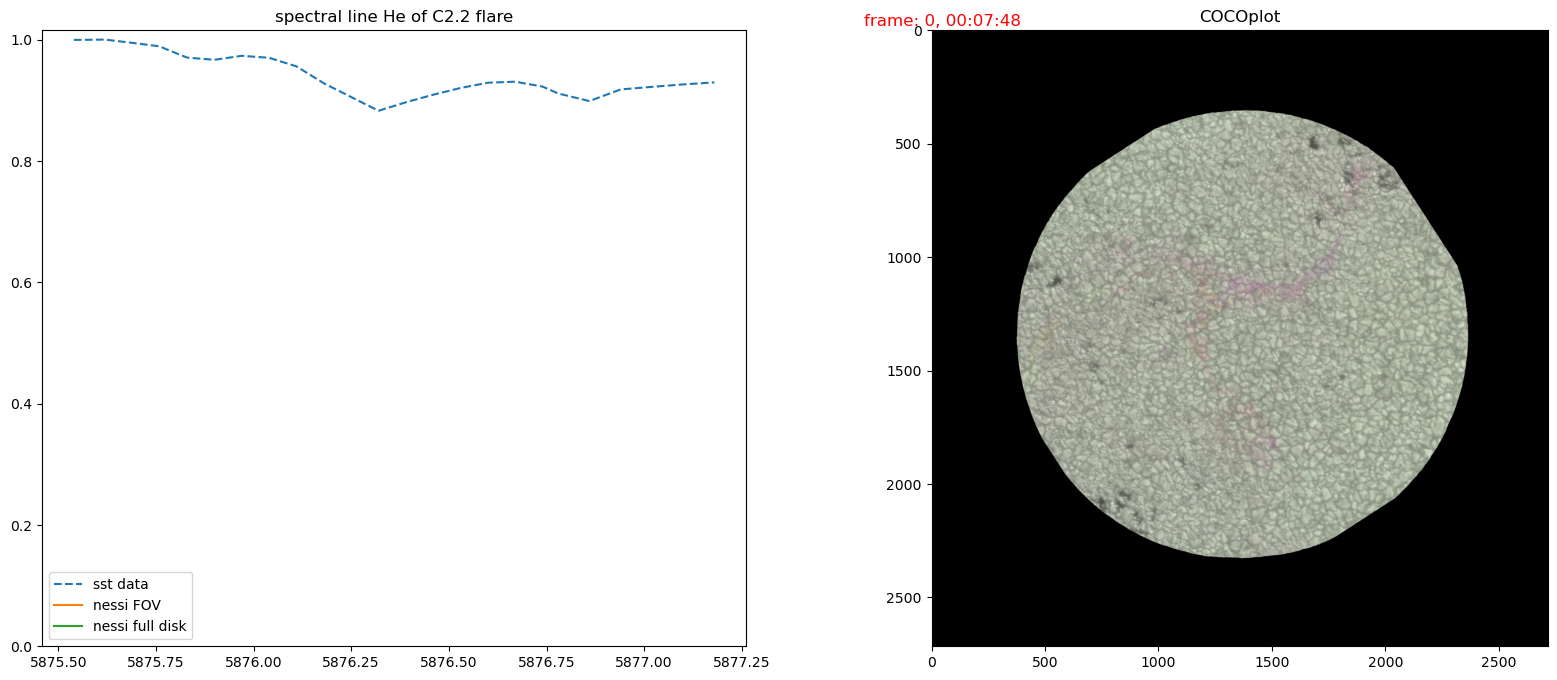

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

In [50]:
# fill in here all arguments
sst_data = He
name_of_flare = "C2.2"
name_of_line = "He"

reload(un1)
un1.Movie_making(None, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)